#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#uploading files to colab


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


reading the files

In [ ]:
data=pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#DATA PREPROCESSING

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


checking null values

In [ ]:
data.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.shape[1]

9

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8


finding out unique values for each column and counting them

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
[ 72  66  64  40  74  50   0 

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data2=data.copy(deep=True)

No categorical data so no dummies

In [ ]:
#Feature Variables
X=data.drop(['Outcome'],axis=1)
print(X)

#Target Variable
y=data['Outcome']
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


#EXPLORATORY DATA ANALYSIS

Distribution of each feature

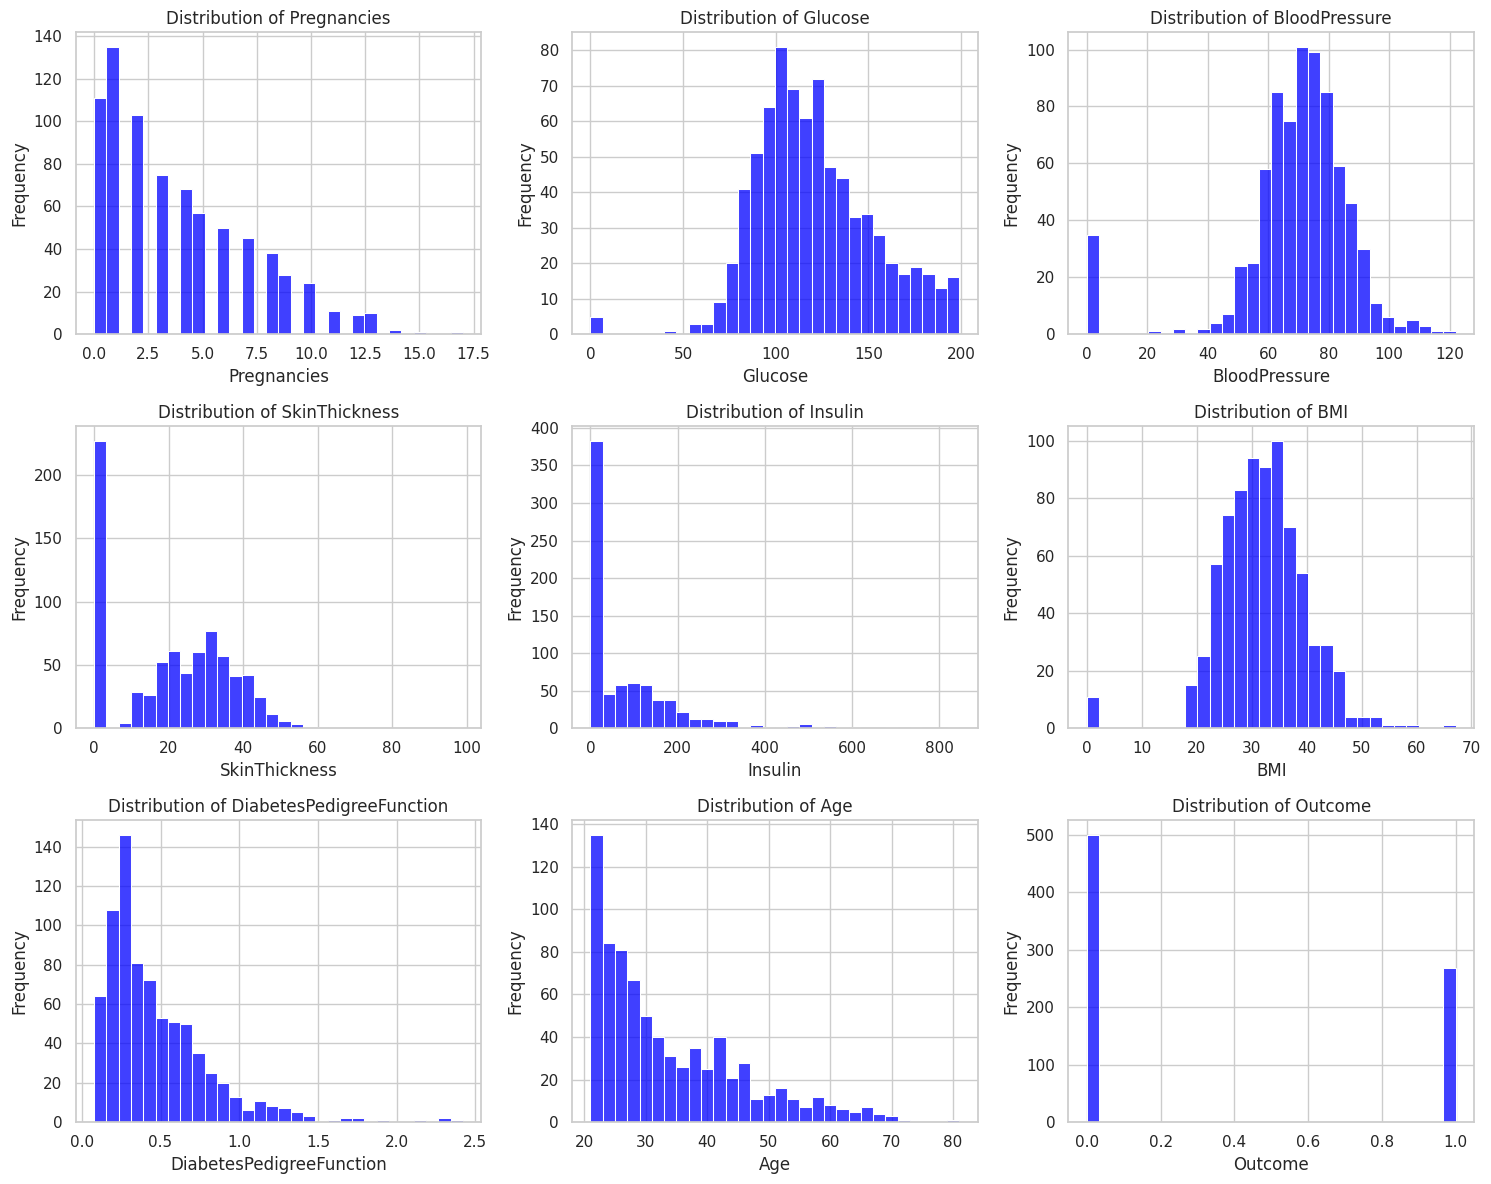

In [ ]:
columns = data.columns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 12))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=False, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


In [ ]:
corr_matrix = data.corr()

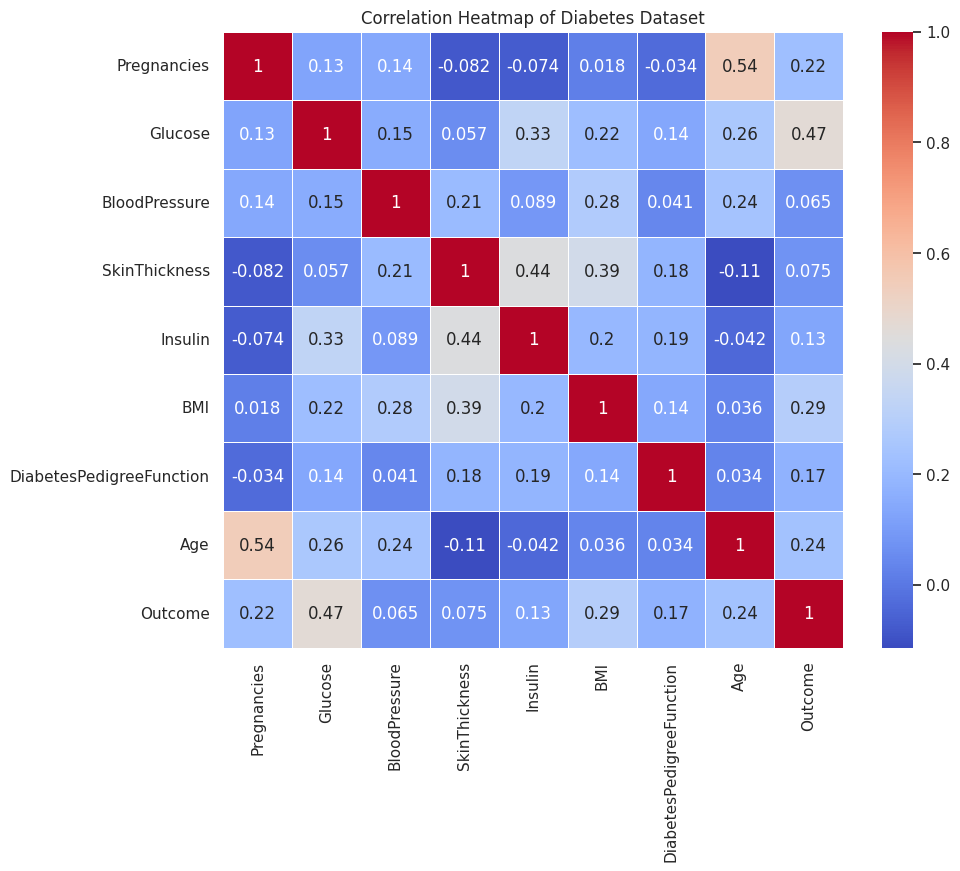

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

Bar graph for Age column

In [ ]:
age_group = pd.cut(data['Age'], bins=[0, 60, data['Age'].max()], labels=['Below 60', 'Above 60'])

In [ ]:
age_counts = age_group.value_counts()

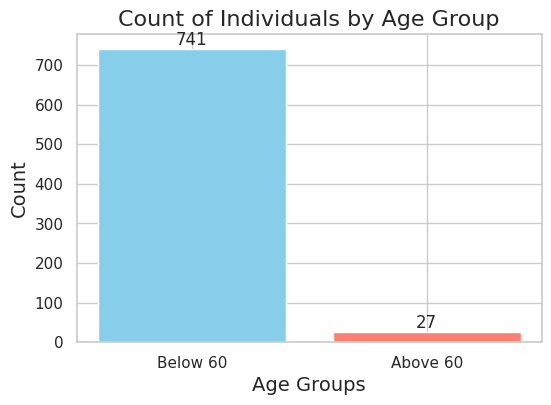

In [ ]:
plt.figure(figsize=(6,4))
bars = plt.bar(age_counts.index, age_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)


plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Individuals by Age Group', fontsize=16)

plt.show()


Scatter plot of Glucose vs BMI

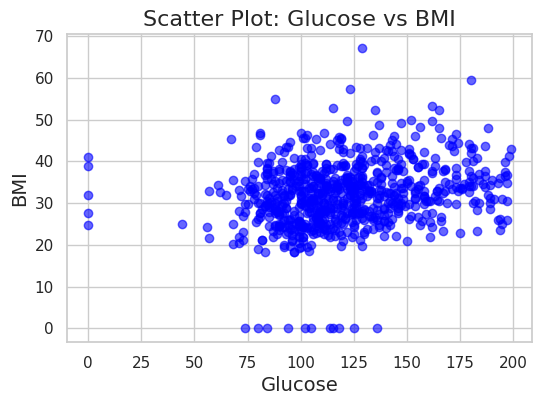

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(data['Glucose'], data['BMI'], color='blue', alpha=0.6)

plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('Scatter Plot: Glucose vs BMI', fontsize=16)

plt.show()

Scatter plot (BMI vs DiabetesPedigreeFunction)

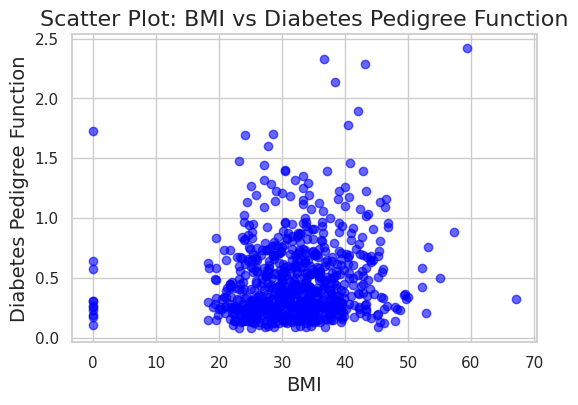

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(data['BMI'], data['DiabetesPedigreeFunction'], color='blue', alpha=0.6)

plt.xlabel('BMI', fontsize=14)
plt.ylabel('Diabetes Pedigree Function', fontsize=14)
plt.title('Scatter Plot: BMI vs Diabetes Pedigree Function', fontsize=16)

plt.show()

code for Pie chart for bmi(checking healthy bmi)

In [ ]:
def convert_bmi_to_categorical(bmi):
    if bmi >=24.9:
        return "Overweight"
    elif bmi >=18.5:
        return "Normal"
    elif bmi<18.5:
        return "Underweight"

In [ ]:
data['BMI'] = data['BMI'].apply(convert_bmi_to_categorical)

In [ ]:
print(data['BMI'].unique())

['Overweight' 'Normal' 'Underweight']


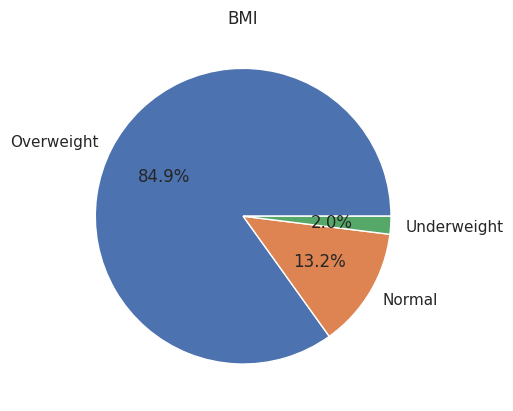

In [ ]:
teams=data['BMI']
label=teams.unique()
sizes=teams.value_counts()
plt.pie(sizes,labels=label,autopct='%1.1f%%')
plt.title('BMI')
plt.show()

Pie-chart for outcome column

In [ ]:
outcome_counts = data['Outcome'].value_counts()

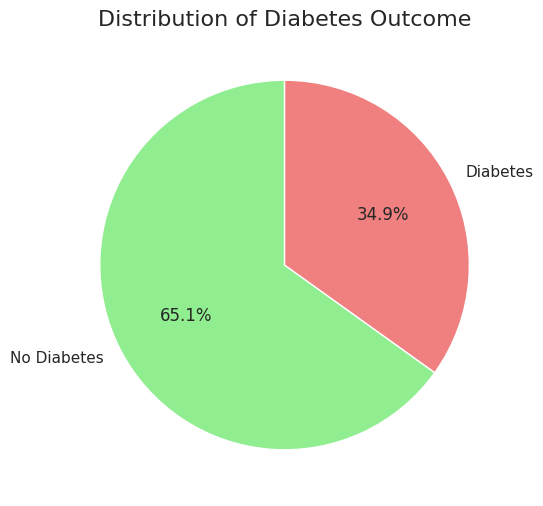

In [ ]:
labels = ['No Diabetes', 'Diabetes']

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])

plt.title('Distribution of Diabetes Outcome', fontsize=16)

plt.show()

In [ ]:
print(data2)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

#Logistic Regression BEFORE MULTICOLLINEARITY CHECKING

In [ ]:
X = data2.drop('Outcome', axis=1)  # Select all columns except 'Outcome'
y = data2['Outcome']  # Select the 'Outcome' column

# 2. Ensure X and y have the same number of samples
print(X.shape)
print(y.shape)


from sklearn.model_selection import train_test_split

X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.20,train_size=0.80)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.25,train_size=0.75)
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.30,train_size=0.70)
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.40,train_size=0.60)

(768, 8)
(768,)


80 - 20 SPLIT

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train1, y_train1)
predictions = logreg.predict(X_test1)
print(predictions)

[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test1, predictions)
z

array([[89, 12],
       [26, 27]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predictions)

0.7532467532467533

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.69      0.51      0.59        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



75 - 25 SPLIT

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train2, y_train2)
predictions = logreg.predict(X_test2)
print(predictions)

[0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test2, predictions)
z

array([[101,  25],
       [ 29,  37]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,predictions)

0.71875

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       126
           1       0.60      0.56      0.58        66

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.71      0.72      0.72       192



70 - 30 split

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train3, y_train3)
predictions = logreg.predict(X_test3)
print(predictions)

[0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test3, predictions)
z

array([[138,  11],
       [ 35,  47]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,predictions)

0.8008658008658008

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       149
           1       0.81      0.57      0.67        82

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.80      0.80      0.79       231



60 - 40 split

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train4, y_train4)
predictions = logreg.predict(X_test4)
print(predictions)

[0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test4, predictions)
z

array([[181,  18],
       [ 50,  59]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,predictions)

0.7792207792207793

In [ ]:
print(classification_report(y_test4,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       199
           1       0.77      0.54      0.63       109

    accuracy                           0.78       308
   macro avg       0.77      0.73      0.74       308
weighted avg       0.78      0.78      0.77       308



#KNN before MULTICOLLINEARITY checking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=20)

80 - 20 SPLIT

In [ ]:
model.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred1=model.predict(X_test1)
y_pred1

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
knn =pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1})
knn

,Actual,Predicted
91,0,0
45,1,1
628,0,0
201,0,0
329,0,0
...,...,...
505,0,0
532,0,0
533,0,0
199,1,0


Evaluation Metric

In [ ]:
accuracy_score(y_test1,y_pred1)

0.7402597402597403

In [ ]:
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[89, 12],
       [28, 25]])

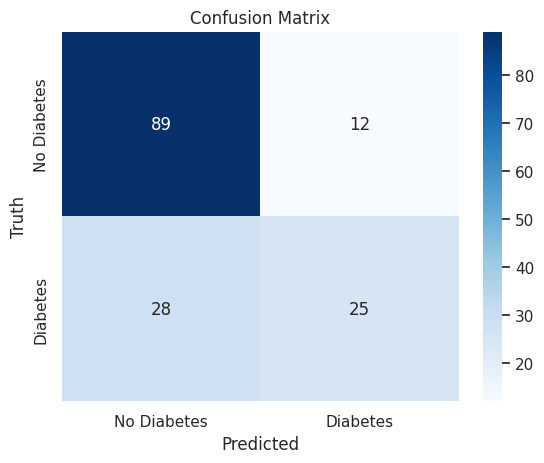

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       101
           1       0.68      0.47      0.56        53

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



75 - 25 SPLIT

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

,Predicted,Actual
481,0,0
337,0,1
397,0,1
34,0,0
62,0,0
...,...,...
383,0,0
244,0,0
248,1,0
130,1,1


Evaluation Metric

In [ ]:
accuracy_score(y_test2,y_pred2)

0.6822916666666666

In [ ]:
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[102,  24],
       [ 37,  29]])

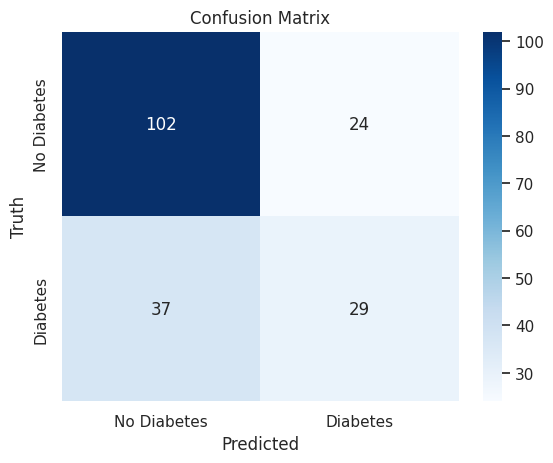

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       126
           1       0.55      0.44      0.49        66

    accuracy                           0.68       192
   macro avg       0.64      0.62      0.63       192
weighted avg       0.67      0.68      0.67       192



70 - 30 SPLIT

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

,Predicted,Actual
536,0,0
321,0,1
43,1,1
717,0,0
256,0,0
...,...,...
571,0,0
279,0,0
714,0,0
620,0,0


Evaluation Metric

In [ ]:
accuracy_score(y_test3,y_pred3)

0.7792207792207793

In [ ]:
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[137,  12],
       [ 39,  43]])

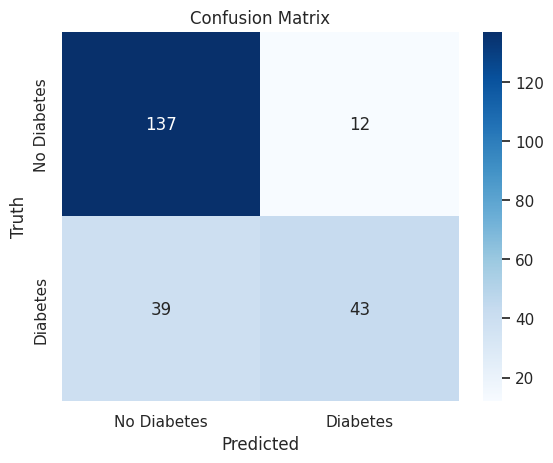

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       149
           1       0.78      0.52      0.63        82

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



60 - 40 SPLIT

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

,Predicted,Actual
392,0,0
711,0,0
51,0,0
17,0,1
726,0,0
...,...,...
170,0,1
648,0,1
600,0,0
197,0,1


Evaluation Metric

In [ ]:
accuracy_score(y_test4,y_pred4)

0.6948051948051948

In [ ]:
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[185,  14],
       [ 80,  29]])

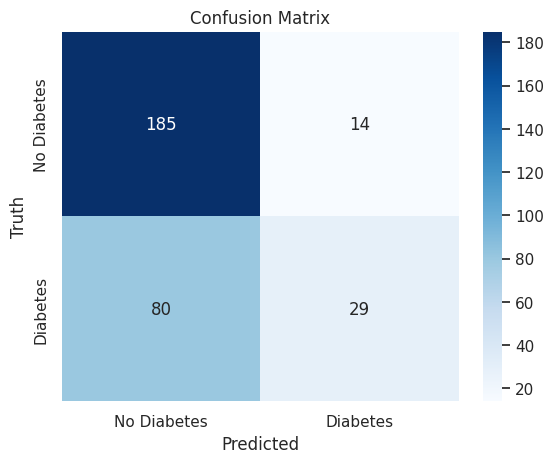

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       199
           1       0.67      0.27      0.38       109

    accuracy                           0.69       308
   macro avg       0.69      0.60      0.59       308
weighted avg       0.69      0.69      0.65       308



#SVM before MULTICOLLINEARITY checkig

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

80 - 20 SPLIT

In [ ]:
model.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

,Predicted,Actual
91,0,0
45,1,1
628,0,0
201,1,0
329,0,0
...,...,...
505,0,0
532,0,0
533,0,0
199,0,1


In [ ]:
accuracy_score(y_test1,y_pred1)

0.7467532467532467

In [ ]:
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[87, 14],
       [25, 28]])

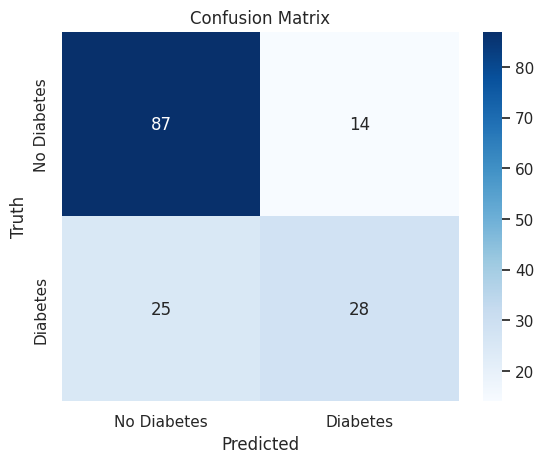

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.67      0.53      0.59        53

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



75 - 25 SPLIT

In [ ]:
model.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

,Predicted,Actual
481,0,0
337,0,1
397,0,1
34,0,0
62,0,0
...,...,...
383,0,0
244,1,0
248,0,0
130,1,1


In [ ]:
accuracy_score(y_test2,y_pred2)

0.7135416666666666

In [ ]:
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[103,  23],
       [ 32,  34]])

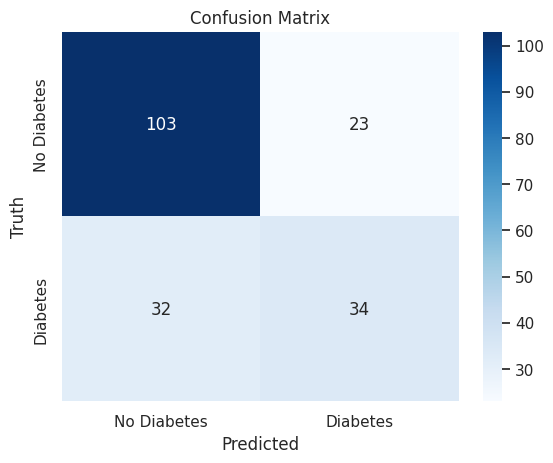

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       126
           1       0.60      0.52      0.55        66

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.71      0.71      0.71       192



70 30 SPLIT

In [ ]:
model.fit(X_train3, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

,Predicted,Actual
536,0,0
321,0,1
43,1,1
717,0,0
256,0,0
...,...,...
571,0,0
279,0,0
714,0,0
620,0,0


In [ ]:
accuracy_score(y_test3,y_pred3)

0.8051948051948052

In [ ]:
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[140,   9],
       [ 36,  46]])

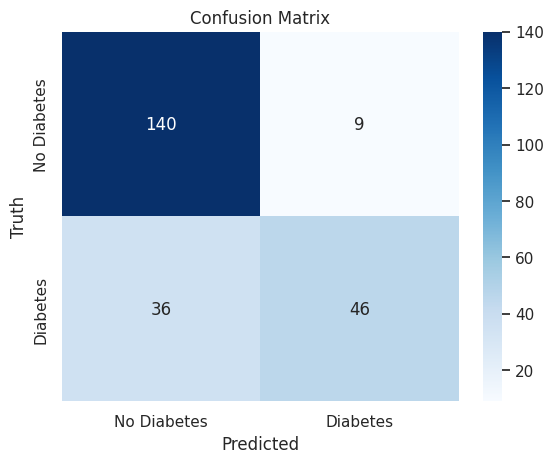

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       149
           1       0.84      0.56      0.67        82

    accuracy                           0.81       231
   macro avg       0.82      0.75      0.77       231
weighted avg       0.81      0.81      0.79       231



60 - 40 SPLIT

In [ ]:
model.fit(X_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

,Predicted,Actual
392,0,0
711,0,0
51,0,0
17,0,1
726,0,0
...,...,...
170,0,1
648,0,1
600,0,0
197,0,1


In [ ]:
accuracy_score(y_test4,y_pred4)

0.7857142857142857

In [ ]:
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[183,  16],
       [ 50,  59]])

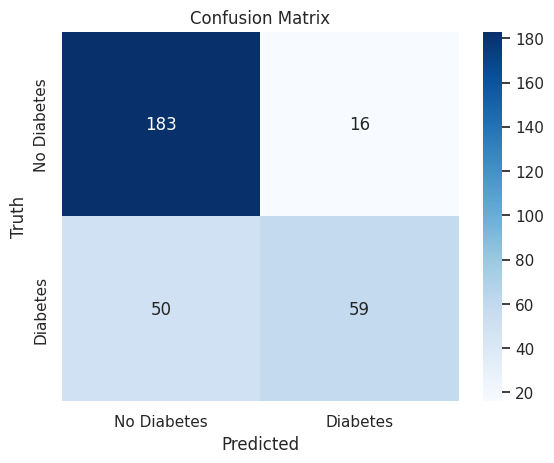

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       199
           1       0.79      0.54      0.64       109

    accuracy                           0.79       308
   macro avg       0.79      0.73      0.74       308
weighted avg       0.79      0.79      0.77       308



#DECISION TREE before MULTICOLLINEARITY checking

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
%matplotlib inline

80 - 20 split

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.6558441558441559


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7207792207792207


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7272727272727273


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7012987012987013


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.6883116883116883


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred_train1))

Accuracy: 0.8697068403908795


75 - 25 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6614583333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6770833333333334


In [ ]:
clf =  DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6770833333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6770833333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6979166666666666


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.8802083333333334


70 - 30 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.70995670995671


In [ ]:
clf =DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7662337662337663


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7662337662337663


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7662337662337663


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7575757575757576


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.8677839851024208


60 - 40 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6525974025974026


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7402597402597403


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7142857142857143


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7435064935064936


In [ ]:
clf =  DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7077922077922078


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.8652173913043478


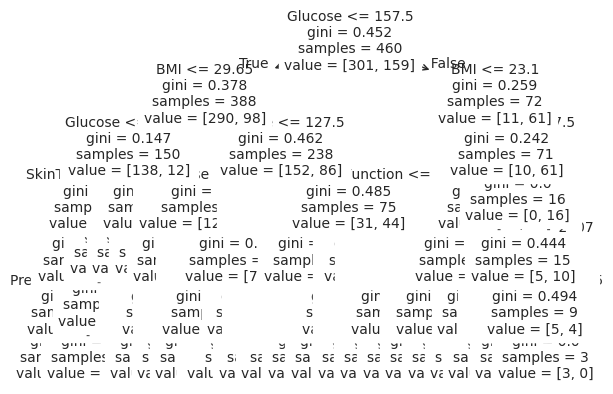

In [ ]:
plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

#BAGGING using RANDOM FOREST before MULTICOLLINEARITY checking

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

80 - 20 SPLIT

In [ ]:
rf.fit(X_train1,y_train1)

RandomForestClassifier()

In [ ]:
y_pred1=rf.predict(X_test1)
y_pred1

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
classification_rep=classification_report(y_test1,y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       101
           1       0.68      0.53      0.60        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[88 13]
 [25 28]]


75 - 26  **SPLIT**

In [ ]:
rf.fit(X_train2,y_train2)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test2)
y_pred2

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
classification_rep=classification_report(y_test1,y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       101
           1       0.68      0.53      0.60        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[88 13]
 [25 28]]


70 - 30 SPLIT

In [ ]:
rf.fit(X_train3,y_train3)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test3)
y_pred3

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
classification_rep=classification_report(y_test3,y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       149
           1       0.73      0.49      0.58        82

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



In [ ]:
print(confusion_matrix(y_test3,y_pred3))

[[134  15]
 [ 42  40]]


60 - 40 SPLIT

In [ ]:
rf.fit(X_train4,y_train4)

RandomForestClassifier()

In [ ]:
y_pred4=rf.predict(X_test4)
y_pred4

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
classification_rep=classification_report(y_test4,y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       199
           1       0.70      0.56      0.62       109

    accuracy                           0.76       308
   macro avg       0.74      0.71      0.72       308
weighted avg       0.75      0.76      0.75       308



#BOOSTING before MULTICOLLINEARITY checking

#XG BOOST

In [ ]:
import xgboost as xgb

In [ ]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

80 -20 SPLIT

In [ ]:
train_model1 = model1.fit(X_train1, y_train1)
train_model2 = model2.fit(X_train1, y_train1)

In [ ]:
pred1 = train_model1.predict(X_test1)
pred2 = train_model2.predict(X_test1)

print('Model 1 XGboost report %r' % (classification_report(y_test1, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test1, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.79      0.76      0.77       101\n           1       0.57      0.60      0.59        53\n\n    accuracy                           0.71       154\n   macro avg       0.68      0.68      0.68       154\nweighted avg       0.71      0.71      0.71       154\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.82       101\n           1       0.65      0.60      0.63        53\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.72       154\nweighted avg       0.75      0.75      0.75       154\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test1, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test1, pred2) * 100))

Accuracy for model 1: 70.78
Accuracy for model 2: 75.32


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train1, y_train1)
pred7 = train_model7.predict(X_test1)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test1, pred7) * 100))

Accuracy for model 7: 71.43


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train1, y_train1)
pred8 = rfc_model.predict(X_test1)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test1, pred8) * 100))

Accuracy for Random Forest model: 74.03


75 - 25 SPLIT

In [ ]:
train_model1 = model1.fit(X_train2, y_train2)
train_model2 = model2.fit(X_train2, y_train2)

In [ ]:
pred1 = train_model1.predict(X_test2)
pred2 = train_model2.predict(X_test2)

print('Model 1 XGboost report %r' % (classification_report(y_test2, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test2, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.80      0.70      0.75       126\n           1       0.54      0.67      0.59        66\n\n    accuracy                           0.69       192\n   macro avg       0.67      0.68      0.67       192\nweighted avg       0.71      0.69      0.69       192\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.79      0.74      0.76       126\n           1       0.55      0.62      0.59        66\n\n    accuracy                           0.70       192\n   macro avg       0.67      0.68      0.67       192\nweighted avg       0.71      0.70      0.70       192\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test2, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test2, pred2) * 100))

Accuracy for model 1: 68.75
Accuracy for model 2: 69.79


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train2, y_train2)
pred7 = train_model7.predict(X_test2)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test2, pred7) * 100))

Accuracy for model 7: 68.75


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train2, y_train2)
pred8 = rfc_model.predict(X_test2)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test2, pred8) * 100))

Accuracy for Random Forest model: 73.44


70 - 30 SPLIT

In [ ]:
train_model1 = model1.fit(X_train3, y_train3)
train_model2 = model2.fit(X_train3, y_train3)

In [ ]:
pred1 = train_model1.predict(X_test3)
pred2 = train_model2.predict(X_test3)

print('Model 1 XGboost report %r' % (classification_report(y_test3, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test3, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.79      0.87      0.82       149\n           1       0.70      0.57      0.63        82\n\n    accuracy                           0.76       231\n   macro avg       0.74      0.72      0.73       231\nweighted avg       0.76      0.76      0.76       231\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.78      0.87      0.82       149\n           1       0.70      0.55      0.62        82\n\n    accuracy                           0.76       231\n   macro avg       0.74      0.71      0.72       231\nweighted avg       0.75      0.76      0.75       231\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test3, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test3, pred2) * 100))

Accuracy for model 1: 76.19
Accuracy for model 2: 75.76


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train3, y_train3)
pred7 = train_model7.predict(X_test3)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test3, pred7) * 100))

Accuracy for model 7: 71.00


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train3, y_train3)
pred8 = rfc_model.predict(X_test3)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test3, pred8) * 100))

Accuracy for Random Forest model: 79.65


60 - 40 SPLIT

In [ ]:
train_model1 = model1.fit(X_train4, y_train4)
train_model2 = model2.fit(X_train4, y_train4)

In [ ]:
pred1 = train_model1.predict(X_test4)
pred2 = train_model2.predict(X_test4)

print('Model 1 XGboost report %r' % (classification_report(y_test4, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test4, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.76      0.81      0.79       199\n           1       0.61      0.54      0.58       109\n\n    accuracy                           0.72       308\n   macro avg       0.69      0.68      0.68       308\nweighted avg       0.71      0.72      0.71       308\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.79       199\n           1       0.61      0.51      0.56       109\n\n    accuracy                           0.71       308\n   macro avg       0.68      0.67      0.67       308\nweighted avg       0.70      0.71      0.70       308\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test4, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test4, pred2) * 100))

Accuracy for model 1: 71.75
Accuracy for model 2: 71.10


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train4, y_train4)
pred7 = train_model7.predict(X_test4)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test4, pred7) * 100))

Accuracy for model 7: 69.81


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train4, y_train4)
pred8 = rfc_model.predict(X_test4)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test4, pred8) * 100))

Accuracy for Random Forest model: 75.65


#ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(estimator = estimator, n_estimators=3, algorithm='SAMME', random_state=0)

80 - 20 SPLIT

In [ ]:
adaboost.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test1)
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
classification_rep=classification_report(y_test1,y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       101
           1       0.57      0.85      0.68        53

    accuracy                           0.73       154
   macro avg       0.73      0.76      0.72       154
weighted avg       0.78      0.73      0.73       154



In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[67 34]
 [ 8 45]]


75 - 25 SPLIT

In [ ]:
adaboost.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred2 = adaboost.predict(X_test2)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
classification_rep=classification_report(y_test2,y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       126
           1       0.54      0.41      0.47        66

    accuracy                           0.68       192
   macro avg       0.63      0.61      0.62       192
weighted avg       0.66      0.68      0.66       192



In [ ]:
print(confusion_matrix(y_test2,y_pred2))

[[103  23]
 [ 39  27]]


70 - 30 SPLIT

In [ ]:
adaboost.fit(X_train3, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred3 = adaboost.predict(X_test3)
y_pred3

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
classification_rep=classification_report(y_test3,y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       149
           1       0.64      0.37      0.47        82

    accuracy                           0.70       231
   macro avg       0.68      0.63      0.63       231
weighted avg       0.69      0.70      0.68       231



In [ ]:
print(confusion_matrix(y_test3,y_pred3))

[[132  17]
 [ 52  30]]


60 - 40 SPLIT

In [ ]:
adaboost.fit(X_train4, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred4 = adaboost.predict(X_test4)
y_pred4

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
classification_rep=classification_report(y_test4,y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       199
           1       0.67      0.62      0.64       109

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.75      0.76      0.75       308



In [ ]:
print(confusion_matrix(y_test4,y_pred4))

[[165  34]
 [ 41  68]]


#MULTICOLLINEARITY checking using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


calc_vif(X)

,variables,VIF
0,Pregnancies,3.275748
1,Glucose,16.725078
2,BloodPressure,14.619512
3,SkinThickness,4.008696
4,Insulin,2.063689
5,BMI,18.408884
6,DiabetesPedigreeFunction,3.195626
7,Age,13.492985


In [ ]:
calc_vif(X.drop('BMI', axis=1))

,variables,VIF
0,Pregnancies,3.272901
1,Glucose,13.573749
2,BloodPressure,12.372453
3,SkinThickness,3.475236
4,Insulin,2.033589
5,DiabetesPedigreeFunction,3.151598
6,Age,13.381319


In [ ]:
calc_vif(X.drop(['BMI','Glucose'], axis=1))

,variables,VIF
0,Pregnancies,3.266130
1,BloodPressure,9.940457
2,SkinThickness,3.475014
3,Insulin,1.859553
4,DiabetesPedigreeFunction,3.026709
5,Age,10.896809


In [ ]:
calc_vif(X.drop(['BMI','Glucose','Age'], axis=1))

,variables,VIF
0,Pregnancies,2.306086
1,BloodPressure,5.288085
2,SkinThickness,3.447548
3,Insulin,1.857940
4,DiabetesPedigreeFunction,2.897474


In [ ]:
calc_vif(X.drop(['BMI','Glucose','Age','BloodPressure'], axis=1))

,variables,VIF
0,Pregnancies,1.666176
1,SkinThickness,2.742648
2,Insulin,1.857175
3,DiabetesPedigreeFunction,2.361138


In [ ]:
X_train_nomulti = X.drop(['BMI','Glucose','Age','BloodPressure'], axis=1)

In [ ]:
X_train1_nomulti, X_test1_nomulti, y_train1, y_test1 = train_test_split(X_train_nomulti, y, test_size=0.20, random_state=42)
X_train2_nomulti, X_test2_nomulti, y_train2, y_test2 = train_test_split(X_train_nomulti, y, test_size=0.25, random_state=42)
X_train3_nomulti, X_test3_nomulti, y_train3, y_test3 = train_test_split(X_train_nomulti, y, test_size=0.30, random_state=42)
X_train4_nomulti, X_test4_nomulti, y_train4, y_test4 = train_test_split(X_train_nomulti, y, test_size=0.40, random_state=42)

#LOGISTIC REGRESSION AFTER MULTICOLLINEARITY checking

80-20 SPLIT

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train1_nomulti, y_train1)
predictions = logreg.predict(X_test1_nomulti)
print(predictions)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1]


In [ ]:
z=confusion_matrix(y_test1, predictions)
z

array([[90,  9],
       [37, 18]])

In [ ]:
accuracy_score(y_test1,predictions)

0.7012987012987013

In [ ]:
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        99
           1       0.67      0.33      0.44        55

    accuracy                           0.70       154
   macro avg       0.69      0.62      0.62       154
weighted avg       0.69      0.70      0.67       154



75 - 25 SPLIT

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train2_nomulti, y_train2)
predictions = logreg.predict(X_test2_nomulti)
print(predictions)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0]


In [ ]:
z=confusion_matrix(y_test2, predictions)
z

array([[110,  13],
       [ 46,  23]])

In [ ]:
accuracy_score(y_test2,predictions)

0.6927083333333334

In [ ]:
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       123
           1       0.64      0.33      0.44        69

    accuracy                           0.69       192
   macro avg       0.67      0.61      0.61       192
weighted avg       0.68      0.69      0.66       192



70 - 30 split

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train3, y_train3)
predictions = logreg.predict(X_test3)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test3, predictions)
z

array([[148,   3],
       [ 80,   0]])

In [ ]:
accuracy_score(y_test3,predictions)

0.6406926406926406

In [ ]:
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       151
           1       0.00      0.00      0.00        80

    accuracy                           0.64       231
   macro avg       0.32      0.49      0.39       231
weighted avg       0.42      0.64      0.51       231



60 - 40 split

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train4, y_train4)
predictions = logreg.predict(X_test4)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test4, predictions)
z

array([[195,  11],
       [ 98,   4]])

In [ ]:
accuracy_score(y_test4,predictions)

0.6461038961038961

In [ ]:
print(classification_report(y_test4,predictions))

              precision    recall  f1-score   support

           0       0.67      0.95      0.78       206
           1       0.27      0.04      0.07       102

    accuracy                           0.65       308
   macro avg       0.47      0.49      0.42       308
weighted avg       0.53      0.65      0.55       308



In [ ]:
import statsmodels.api as sm

#KNN after MULTICOLLINEARITY checking

80 - 20 SPLIT

In [ ]:
model.fit(X_train1_nomulti, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,0,1
534,0,0
344,0,0
296,0,1


Evaluation Metric

In [ ]:
accuracy_score(y_test1,y_pred1)

0.6428571428571429

In [ ]:
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[99,  0],
       [55,  0]])

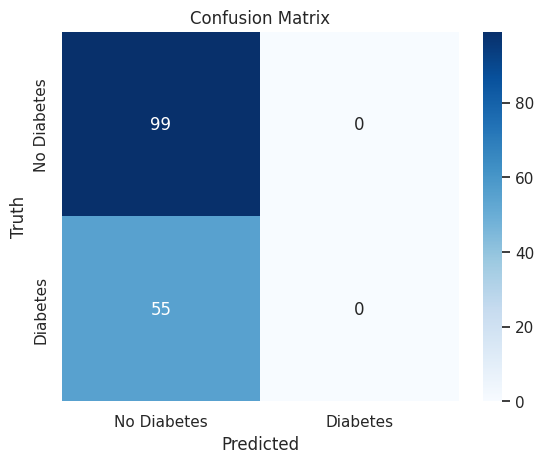

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


75 - 25 SPLT

In [ ]:
model.fit(X_train2_nomulti, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
554,0,0
319,0,1
594,0,0
6,0,1


Evaluation Metric

In [ ]:
accuracy_score(y_test2,y_pred2)

0.640625

In [ ]:
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[123,   0],
       [ 69,   0]])

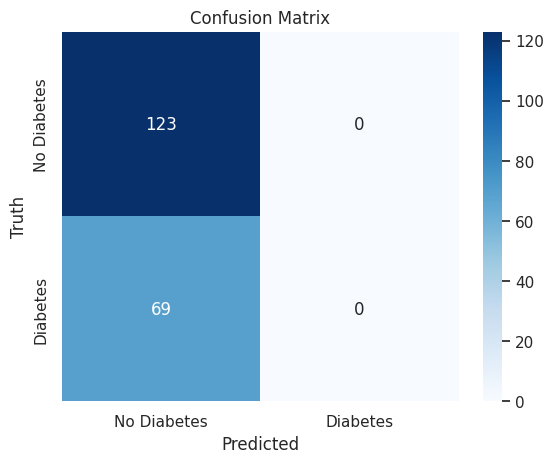

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       123
           1       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


70 - 30 SPLIT

In [ ]:
model.fit(X_train3_nomulti, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
619,0,1
198,0,1
538,0,0
329,0,0


Evaluation Metric

In [ ]:
accuracy_score(y_test3,y_pred3)

0.6536796536796536

In [ ]:
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[151,   0],
       [ 80,   0]])

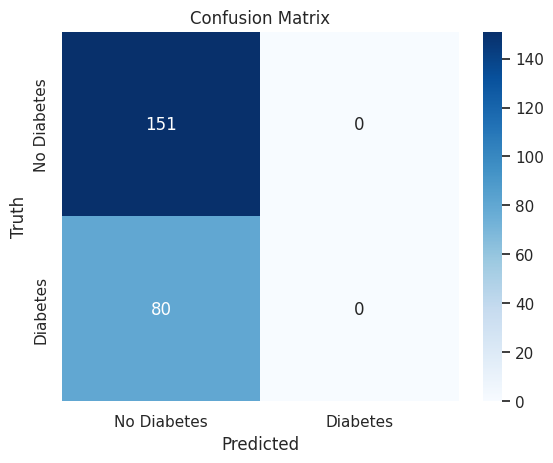

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


60 - 40 SPLIT

In [ ]:
model.fit(X_train4_nomulti, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
367,0,0
446,0,0
589,0,0
342,0,0


Evaluation Metric

In [ ]:
accuracy_score(y_test4,y_pred4)

0.6948051948051948

In [ ]:
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[194,  12],
       [ 82,  20]])

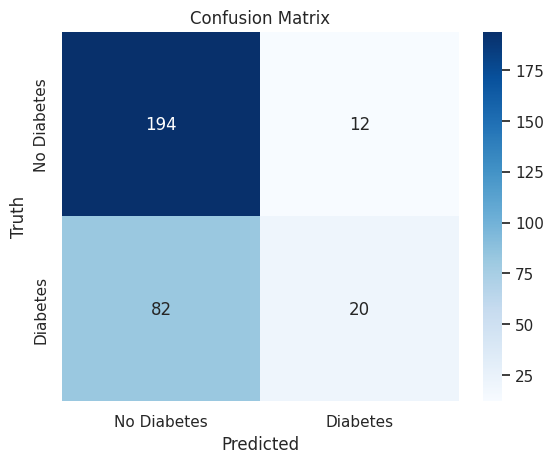

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       206
           1       0.62      0.20      0.30       102

    accuracy                           0.69       308
   macro avg       0.66      0.57      0.55       308
weighted avg       0.68      0.69      0.64       308



#SVM after MULTICOLLINEARITY checking

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

80 - 20 SPLIT

In [ ]:
model1.fit(X_train1_nomulti, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model1.predict(X_test1_nomulti)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,0,1
534,0,0
344,0,0
296,0,1


In [ ]:
accuracy_score(y_test1,y_pred1)

0.6428571428571429

In [ ]:
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[99,  0],
       [55,  0]])

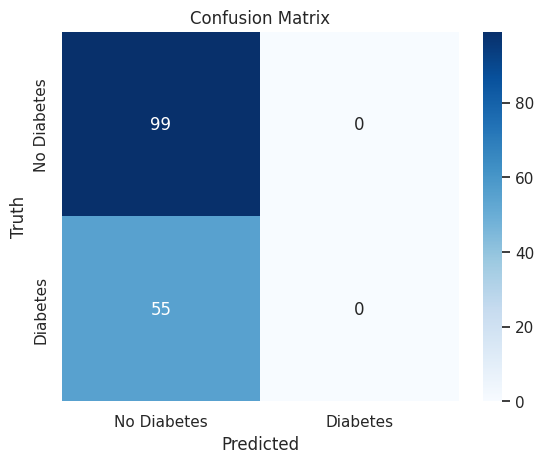

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


75 - 25 SPLIT

In [ ]:
model1.fit(X_train2_nomulti, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model1.predict(X_test2_nomulti)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
554,0,0
319,0,1
594,0,0
6,0,1


In [ ]:
accuracy_score(y_test2,y_pred2)

0.640625

In [ ]:
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[123,   0],
       [ 69,   0]])

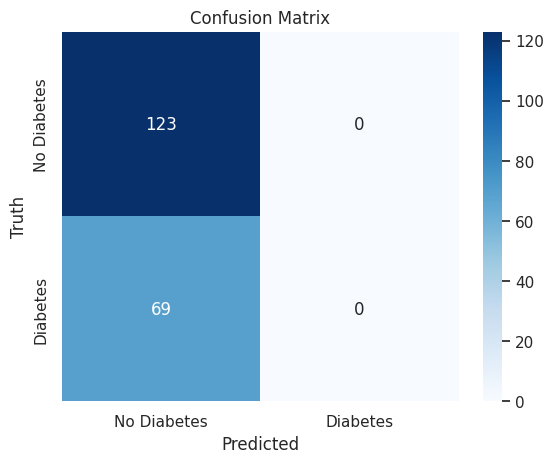

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       123
           1       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


70 - 30 SPLIT

In [ ]:
model1.fit(X_train3_nomulti, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model1.predict(X_test3_nomulti)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
619,0,1
198,0,1
538,0,0
329,0,0


In [ ]:
accuracy_score(y_test3,y_pred3)

0.6536796536796536

In [ ]:
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[151,   0],
       [ 80,   0]])

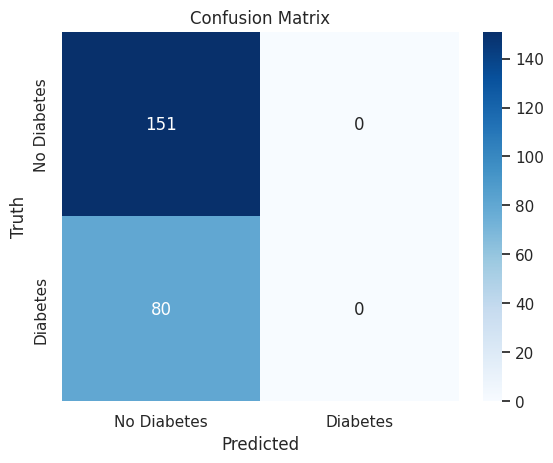

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


60 - 40 SPLIT

In [ ]:
model1.fit(X_train4_nomulti, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model1.predict(X_test4_nomulti)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

,Predicted,Actual
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
367,0,0
446,0,0
589,0,0
342,0,0


In [ ]:
accuracy_score(y_test4,y_pred4)

0.6948051948051948

In [ ]:
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[194,  12],
       [ 82,  20]])

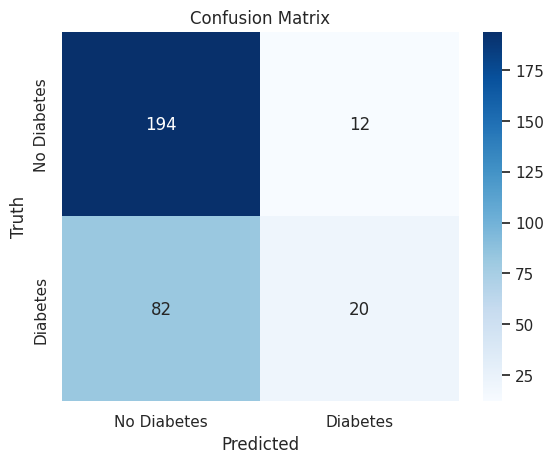

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       206
           1       0.62      0.20      0.30       102

    accuracy                           0.69       308
   macro avg       0.66      0.57      0.55       308
weighted avg       0.68      0.69      0.64       308



#DECISION TREE after MULTICOLLINEARITY checking

80 - 20 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1_nomulti,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.577922077922078


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7012987012987013


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.6818181818181818


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.6948051948051948


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.6493506493506493


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred_train1))

Accuracy: 0.762214983713355


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2_nomulti,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.5677083333333334


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6927083333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6770833333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6875


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6354166666666666


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.7760416666666666


75 - 25 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2_nomulti,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.5833333333333334


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6927083333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6770833333333334


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6875


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6458333333333334


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.7760416666666666


70 - 30 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3_nomulti,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.645021645021645


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.696969696969697


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.6926406926406926


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.6796536796536796


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.670995670995671


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.7914338919925512


60 - 40 SPLIT

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4_nomulti,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6363636363636364


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6590909090909091


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6915584415584416


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6883116883116883


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6818181818181818


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.7956521739130434


#BAGGING after MULTICOLLINEARITY checking

In [ ]:
rf=RandomForestClassifier()

80 - 20 SPLIT

In [ ]:
rf.fit(X_train1_nomulti,y_train1)

RandomForestClassifier()

In [ ]:
y_pred1=rf.predict(X_test1_nomulti)
y_pred1

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
classification_rep=classification_report(y_test1,y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        99
           1       0.48      0.44      0.46        55

    accuracy                           0.63       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.62      0.63      0.63       154



In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[73 26]
 [31 24]]


75 - 25 SPLIT

In [ ]:
rf.fit(X_train2_nomulti,y_train2)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test2_nomulti)
y_pred2

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
classification_rep=classification_report(y_test2,y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       123
           1       0.52      0.46      0.49        69

    accuracy                           0.66       192
   macro avg       0.62      0.61      0.62       192
weighted avg       0.65      0.66      0.65       192



In [ ]:
print(confusion_matrix(y_test2,y_pred2))

[[94 29]
 [37 32]]


70 - 30 SPLIT

In [ ]:
rf.fit(X_train3_nomulti,y_train3)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test3_nomulti)
y_pred3

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
classification_rep=classification_report(y_test3,y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       151
           1       0.50      0.46      0.48        80

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.65      0.65      0.65       231



In [ ]:
print(confusion_matrix(y_test3,y_pred3))

[[114  37]
 [ 43  37]]


60 - 40 SPLIT

In [ ]:
rf.fit(X_train4_nomulti,y_train4)

RandomForestClassifier()

In [ ]:
y_pred4=rf.predict(X_test4_nomulti)
y_pred4

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
classification_rep=classification_report(y_test4,y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       206
           1       0.52      0.55      0.54       102

    accuracy                           0.69       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.69      0.69      0.69       308



In [ ]:
print(confusion_matrix(y_test4,y_pred4))

[[155  51]
 [ 46  56]]


#BOOSTING after MULTICOLLINEARITY checking

#XGBoost

In [ ]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

80 - 20 SPLIT

In [ ]:
train_model1 = model1.fit(X_train1_nomulti, y_train1)
train_model2 = model2.fit(X_train1_nomulti, y_train1)

In [ ]:
pred1 = train_model1.predict(X_test1_nomulti)
pred2 = train_model2.predict(X_test1_nomulti)

print('Model 1 XGboost report %r' % (classification_report(y_test1, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test1, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.69      0.67      0.68        99\n           1       0.44      0.47      0.46        55\n\n    accuracy                           0.60       154\n   macro avg       0.57      0.57      0.57       154\nweighted avg       0.60      0.60      0.60       154\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.72      0.74      0.73        99\n           1       0.50      0.47      0.49        55\n\n    accuracy                           0.64       154\n   macro avg       0.61      0.61      0.61       154\nweighted avg       0.64      0.64      0.64       154\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test1, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test1, pred2) * 100))

Accuracy for model 1: 59.74
Accuracy for model 2: 64.29


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train1_nomulti, y_train1)
pred7 = train_model7.predict(X_test1_nomulti)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test1, pred7) * 100))

Accuracy for model 7: 60.39


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train1_nomulti, y_train1)
pred8 = rfc_model.predict(X_test1_nomulti)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test1, pred8) * 100))

Accuracy for Random Forest model: 62.99


75 - 25 SPLIT

In [ ]:
train_model1 = model1.fit(X_train2_nomulti, y_train2)
train_model2 = model2.fit(X_train2_nomulti, y_train2)

In [ ]:
pred1 = train_model1.predict(X_test2_nomulti)
pred2 = train_model2.predict(X_test2_nomulti)

print('Model 1 XGboost report %r' % (classification_report(y_test2, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test2, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.70      0.67      0.68       123\n           1       0.45      0.49      0.47        69\n\n    accuracy                           0.60       192\n   macro avg       0.58      0.58      0.58       192\nweighted avg       0.61      0.60      0.61       192\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.74      0.78      0.76       123\n           1       0.56      0.51      0.53        69\n\n    accuracy                           0.68       192\n   macro avg       0.65      0.64      0.65       192\nweighted avg       0.68      0.68      0.68       192\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test2, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test2, pred2) * 100))

Accuracy for model 1: 60.42
Accuracy for model 2: 68.23


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train2_nomulti, y_train2)
pred7 = train_model7.predict(X_test2_nomulti)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test2, pred7) * 100))

Accuracy for model 7: 66.67


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train2_nomulti, y_train2)
pred8 = rfc_model.predict(X_test2_nomulti)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test2, pred8) * 100))

Accuracy for Random Forest model: 66.67


70 - 30 SPLIT

In [ ]:
train_model1 = model1.fit(X_train3_nomulti, y_train3)
train_model2 = model2.fit(X_train3_nomulti, y_train3)

In [ ]:
pred1 = train_model1.predict(X_test3_nomulti)
pred2 = train_model2.predict(X_test3_nomulti)

print('Model 1 XGboost report %r' % (classification_report(y_test3, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test3, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.73      0.71      0.72       151\n           1       0.48      0.50      0.49        80\n\n    accuracy                           0.64       231\n   macro avg       0.60      0.60      0.60       231\nweighted avg       0.64      0.64      0.64       231\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.72      0.80      0.76       151\n           1       0.53      0.42      0.47        80\n\n    accuracy                           0.67       231\n   macro avg       0.63      0.61      0.62       231\nweighted avg       0.66      0.67      0.66       231\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test3, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test3, pred2) * 100))

Accuracy for model 1: 63.64
Accuracy for model 2: 67.10


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train3_nomulti, y_train3)
pred7 = train_model7.predict(X_test3_nomulti)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test3, pred7) * 100))

Accuracy for model 7: 66.23


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train3_nomulti, y_train3)
pred8 = rfc_model.predict(X_test3_nomulti)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test3, pred8) * 100))

Accuracy for Random Forest model: 67.97


60 - 40 SPLIT

In [ ]:
train_model1 = model1.fit(X_train4_nomulti, y_train4)
train_model2 = model2.fit(X_train4_nomulti, y_train4)

In [ ]:
pred1 = train_model1.predict(X_test4_nomulti)
pred2 = train_model2.predict(X_test4_nomulti)

print('Model 1 XGboost report %r' % (classification_report(y_test4, pred1)))
print('Model 2 XGboost report %r' % (classification_report(y_test4, pred2)))

Model 1 XGboost report '              precision    recall  f1-score   support\n\n           0       0.75      0.72      0.73       206\n           1       0.47      0.51      0.49       102\n\n    accuracy                           0.65       308\n   macro avg       0.61      0.61      0.61       308\nweighted avg       0.66      0.65      0.65       308\n'
Model 2 XGboost report '              precision    recall  f1-score   support\n\n           0       0.74      0.73      0.74       206\n           1       0.47      0.48      0.48       102\n\n    accuracy                           0.65       308\n   macro avg       0.61      0.61      0.61       308\nweighted avg       0.65      0.65      0.65       308\n'


In [ ]:
print('Accuracy for model 1: %.2f' % (accuracy_score(y_test4, pred1) * 100))
print('Accuracy for model 2: %.2f' % (accuracy_score(y_test4, pred2) * 100))

Accuracy for model 1: 64.94
Accuracy for model 2: 64.94


In [ ]:
xgb2 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.7, subsample=0.5)

In [ ]:
train_model7 = xgb2.fit(X_train4_nomulti, y_train4)
pred7 = train_model7.predict(X_test4_nomulti)
print('Accuracy for model 7: %.2f' % (accuracy_score(y_test4, pred7) * 100))

Accuracy for model 7: 66.23


In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train4_nomulti, y_train4)
pred8 = rfc_model.predict(X_test4_nomulti)
print('Accuracy for Random Forest model: %.2f' % (accuracy_score(y_test4, pred8) * 100))

Accuracy for Random Forest model: 67.53


#ADABoost

In [ ]:
estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(estimator = estimator, n_estimators=3, algorithm='SAMME', random_state=0)

80 - 20 SPLIT

In [ ]:
adaboost.fit(X_train1_nomulti, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test1_nomulti)
y_pred1

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
classification_rep=classification_report(y_test1,y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.53      0.58      0.56        55

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[71 28]
 [23 32]]


75 - 25 SPLIT

In [ ]:
adaboost.fit(X_train2_nomulti, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test2_nomulti)
y_pred1

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
classification_rep=classification_report(y_test2,y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       123
           1       0.52      0.46      0.49        69

    accuracy                           0.66       192
   macro avg       0.62      0.61      0.62       192
weighted avg       0.65      0.66      0.65       192



In [ ]:
print(confusion_matrix(y_test2,y_pred2))

[[94 29]
 [37 32]]


70 - 30 SPLIT

In [ ]:
adaboost.fit(X_train3_nomulti, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test3_nomulti)
y_pred1

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
classification_rep=classification_report(y_test3,y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       151
           1       0.50      0.46      0.48        80

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.65      0.65      0.65       231



In [ ]:
print(confusion_matrix(y_test3,y_pred3))

[[114  37]
 [ 43  37]]


60 - 40 SPLIT

In [ ]:
adaboost.fit(X_train4_nomulti, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test4_nomulti)
y_pred1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
classification_rep=classification_report(y_test4,y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       206
           1       0.52      0.55      0.54       102

    accuracy                           0.69       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.69      0.69      0.69       308



In [ ]:
print(confusion_matrix(y_test4,y_pred4))

[[155  51]
 [ 46  56]]


#NEURAL NETWORK BEFORE MULTICOLLINEARITY CHECKING

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,Overweight,0.627,50,1
1,1,85,66,29,0,Overweight,0.351,31,0
2,8,183,64,0,0,Normal,0.672,32,1
3,1,89,66,23,94,Overweight,0.167,21,0
4,0,137,40,35,168,Overweight,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,Overweight,0.171,63,0
764,2,122,70,27,0,Overweight,0.340,27,0
765,5,121,72,23,112,Overweight,0.245,30,0
766,1,126,60,0,0,Overweight,0.349,47,1


80 - 20 TRAIN_TEST_SPLIT

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dense(40, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train1,
    y_train1,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6644 - loss: 1.2822 - precision: 0.5203 - recall: 0.1476
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.8640 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.7715 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.7217 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.6992 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.6812 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6617 - loss: 0.6734 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6617 - loss: 0.6693 - precision: 0.0000e+00 -

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6430 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.652043879032135, 0.6428571343421936, 0.0, 0.0]

<Axes: >

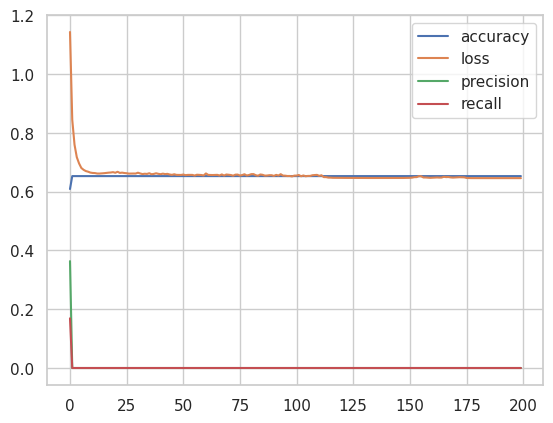

In [ ]:
pd.DataFrame(history.history).plot()

75-25 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train2.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train2,
    y_train2,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6129 - loss: 1.3916 - precision: 0.4228 - recall: 0.2715
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5917 - loss: 0.8916 - precision: 0.1977 - recall: 0.0734
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6492 - loss: 0.8039 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6492 - loss: 0.7579 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6492 - loss: 0.7320 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.7117 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6492 - loss: 0.7045 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6492 - loss: 0.6932 - precision: 0.0000e+00 - recall:

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test2, y_test2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6460 - loss: 0.6623 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.6724826693534851, 0.6302083134651184, 0.0, 0.0]

<Axes: >

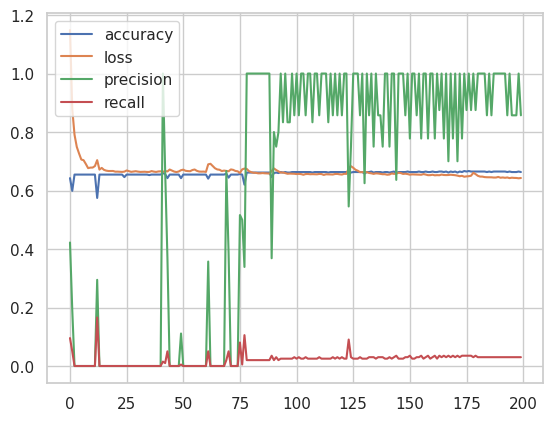

In [ ]:
pd.DataFrame(history.history).plot()

70-30 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train3.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train3,
    y_train3,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5751 - loss: 1.3384 - precision: 0.2821 - recall: 0.1426
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6344 - loss: 0.9052 - precision: 0.3507 - recall: 0.0538
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6363 - loss: 0.8402 - precision: 0.1897 - recall: 0.0338
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.7920 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6418 - loss: 0.7590 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6418 - loss: 0.7484 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.7204 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.7118 - precision: 0.0000e+00 - recall: 0.0000e

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test3, y_test3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6555 - loss: 0.6482 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.6496061682701111, 0.6536796689033508, 0.0, 0.0]

<Axes: >

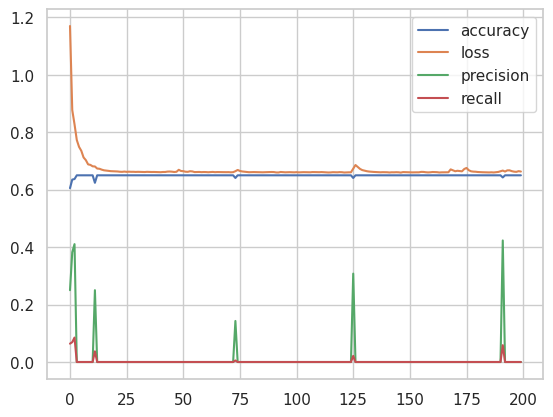

In [ ]:
pd.DataFrame(history.history).plot()

60-40 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train4.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train4,
    y_train4,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5586 - loss: 1.3249 - precision: 0.3160 - recall: 0.1229
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6039 - loss: 0.8685 - precision: 0.1667 - recall: 0.0322         
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.8028 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.7493 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5819 - loss: 0.7372 - precision: 0.1789 - recall: 0.1137         
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6159 - loss: 0.7324 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6159 - loss: 0.7035 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6159 - loss: 0.6973 - precis

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test3, y_test3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6555 - loss: 0.6539 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.6618632674217224, 0.6536796689033508, 0.0, 0.0]

<Axes: >

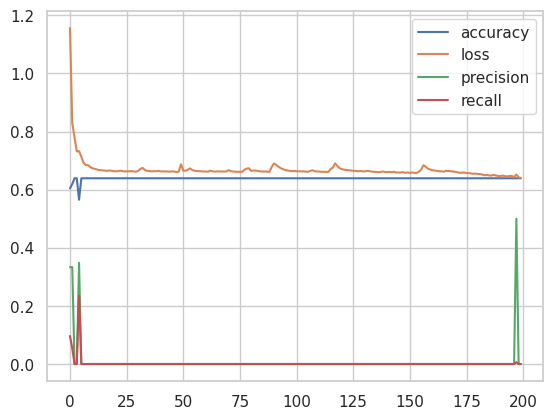

In [ ]:
pd.DataFrame(history.history).plot()

#NEURAL NETWORK AFTER MULTICOLLINEARITY CHECKING

80-20 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train1_nomulti.shape[1],)),
    tf.keras.layers.Dense(40, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train1_nomulti,
    y_train1,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6077 - loss: 1.3121 - precision: 0.3242 - recall: 0.1438
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - loss: 0.8718 - precision: 0.4072 - recall: 0.1205 
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6573 - loss: 0.7701 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.7148 - precision: 0.6751 - recall: 0.0792         
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6716 - loss: 0.6968 - precision: 0.5479 - recall: 0.1381
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.6813 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.6659 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.6601 - precision: 0.0000e+00 - recall: 0.0

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test1_nomulti, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6484 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.6555080413818359, 0.6428571343421936, 0.0, 0.0]

<Axes: >

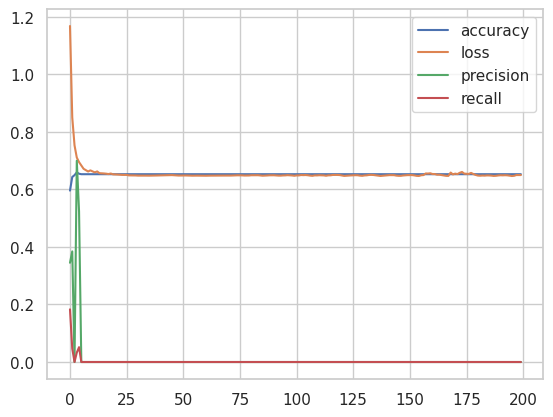

In [ ]:
pd.DataFrame(history.history).plot()

75-25 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train2_nomulti.shape[1],)),
    tf.keras.layers.Dense(40, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train2_nomulti,
    y_train2,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6149 - loss: 1.3479 - precision: 0.4128 - recall: 0.2879
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6430 - loss: 0.9211 - precision: 0.4323 - recall: 0.0473
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6494 - loss: 0.7993 - precision: 0.5087 - recall: 0.0558
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6473 - loss: 0.7220 - precision: 0.0765 - recall: 0.0047        
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6493 - loss: 0.7049 - precision: 0.5265 - recall: 0.0601
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6230 - loss: 0.6953 - precision: 0.3182 - recall: 0.0675
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5774 - loss: 0.7071 - precision: 0.3138 - recall: 0.2031
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 0.6953 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 9/200
21/21 ━

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test2_nomulti, y_test2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6522 - loss: 0.6686 - precision: 0.5090 - recall: 0.1254  


[0.6680875420570374,
 0.6510416865348816,
 0.5833333134651184,
 0.10144927352666855]

<Axes: >

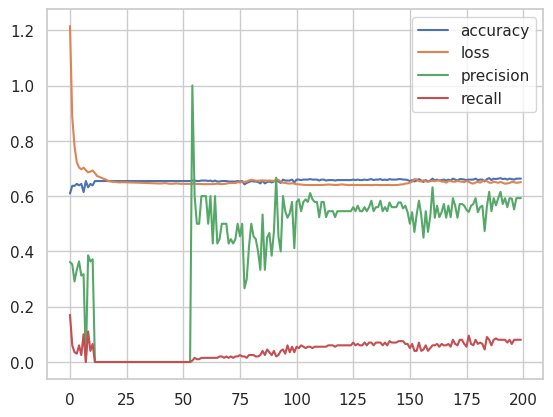

In [ ]:
pd.DataFrame(history.history).plot()

70-30 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train3_nomulti.shape[1],)),
    tf.keras.layers.Dense(40, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train3_nomulti,
    y_train3,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6248 - loss: 1.3343 - precision: 0.3680 - recall: 0.0829        
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6338 - loss: 0.8848 - precision: 0.1188 - recall: 0.0056
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6315 - loss: 0.7723 - precision: 0.1020 - recall: 0.0056         
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.7273 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.7047 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6856 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6794 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.6718 - precision: 0.0000e

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test3_nomulti, y_test3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - loss: 0.6494 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.6490037441253662, 0.6536796689033508, 0.0, 0.0]

<Axes: >

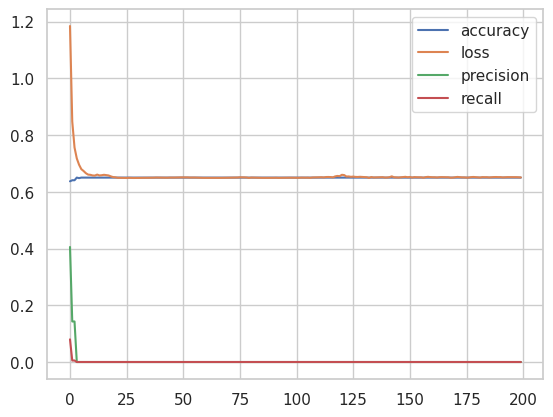

In [ ]:
pd.DataFrame(history.history).plot()

60-40 Train Test Split

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train4_nomulti.shape[1],)),
    tf.keras.layers.Dense(40, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Slightly increased learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# STEP 3: Fit the model
# Adding validation split to monitor generalization
history = model.fit(
    X_train4_nomulti,
    y_train4,
    epochs=200,
    batch_size=28,  # Smaller batch size for more updates
    )

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5055 - loss: 1.4957 - precision: 0.2949 - recall: 0.2372        
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5708 - loss: 1.0652 - precision: 0.2136 - recall: 0.0483         
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.9219 - precision: 0.2331 - recall: 0.0311         
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5982 - loss: 0.8441 - precision: 0.2411 - recall: 0.0465
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6162 - loss: 0.8030 - precision: 0.3889 - recall: 0.0065         
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 0.7835 - precision: 0.2112 - recall: 0.0174         
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.7685 - precision: 0.1684 - recall: 0.0154         
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 0.7588 - precision: 0.1915 

In [ ]:
# STEP 4: Evaluate the model
model.evaluate(X_test4_nomulti, y_test4)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6964 - loss: 0.6016 - precision: 0.6509 - recall: 0.1846          


[0.6037399172782898, 0.698051929473877, 0.6800000071525574, 0.1666666716337204]

<Axes: >

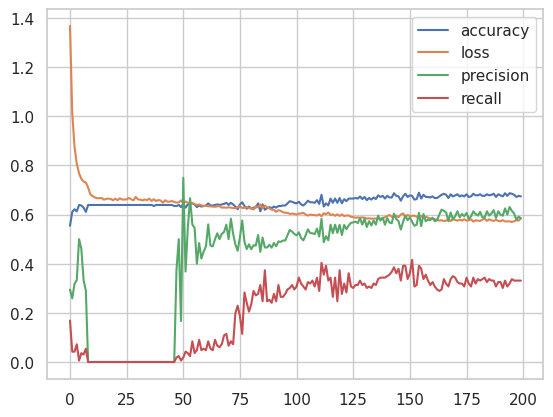

In [ ]:
pd.DataFrame(history.history).plot()